- I have downloaded this Breast Cancer datasets from UCI machine learning repository maintained by the University of California, Irvine.
- The dataset contains 569 samples of malignant and benign tumor cells.
- The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant,
    B=benign), respectively.
- The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to
    build a model to predict whether a tumor is benign or malignant.
    1= Malignant (Cancerous) - Present (M) 0= Benign (Not Cancerous) -Absent (B)
    
- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# loading the Data 

df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


*The last column named "Unaname: 32" seems like an erronous coloumn in our dataset. We might probably just drop it.
Most of the columns seem to have a numeric entry. This would save our time from mapping the variables.
The ID column would not help us contributing to predict about the cancer. We might as well drop it.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*Only the 'diagnosis' column, which we have to predict is of object datatype.
There's only ID column of int type. We will probably drop it anyway.
There are a total of 31 columns which are of float datatype*

In [9]:
# Checking the Null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

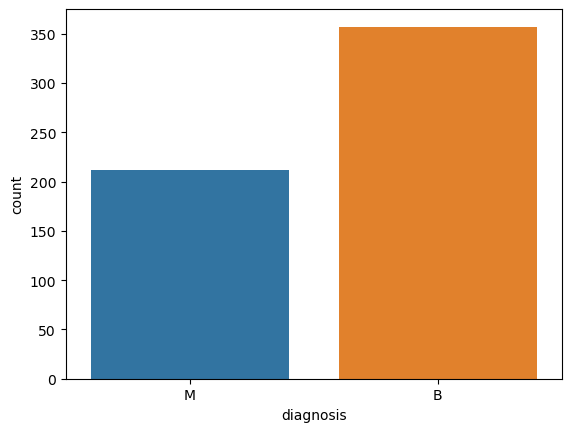

In [12]:
sns.countplot(x = df['diagnosis'], data = df)

Number of Benign:  357
Number of Malignant :  212


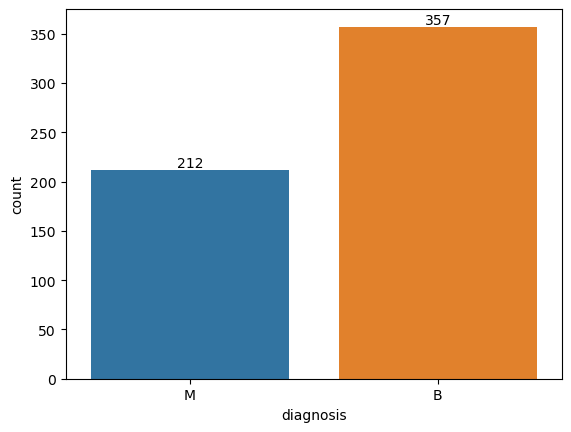

In [16]:
ax = sns.countplot(data = df, x = df['diagnosis'])

for bars in ax.containers:
    ax.bar_label(bars)

B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)


<AxesSubplot:>

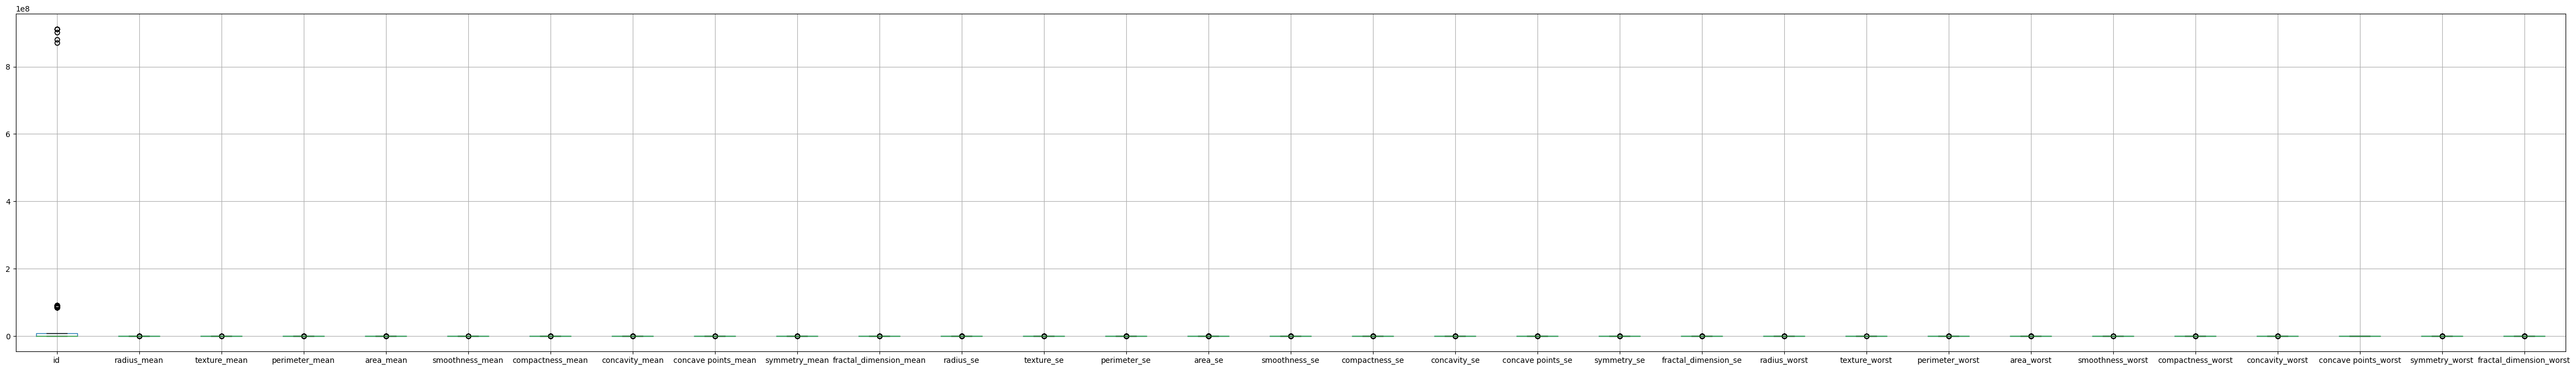

In [17]:
#We would need to eliminate the outliers so that it does not affects our model's accuracy. Let us see if there are any outliers present in th
plt.figure(figsize=(60,8))
df.boxplot()


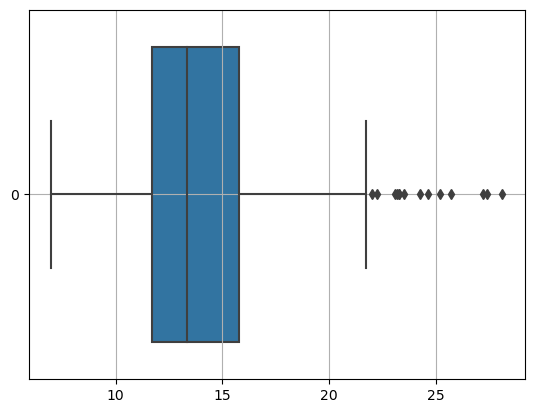

In [23]:
sns.boxplot(df['radius_mean'], orient='h')
plt.grid()

<AxesSubplot:>

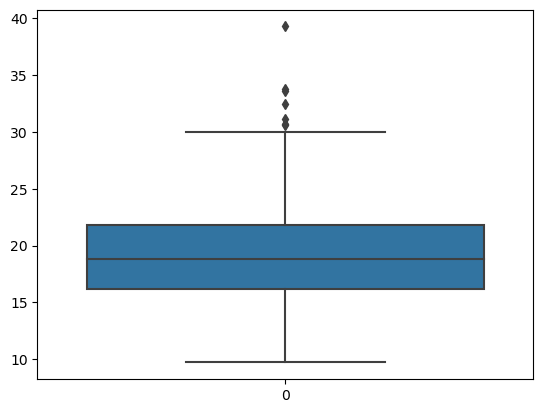

In [24]:
sns.boxplot(df['texture_mean'])

<AxesSubplot:>

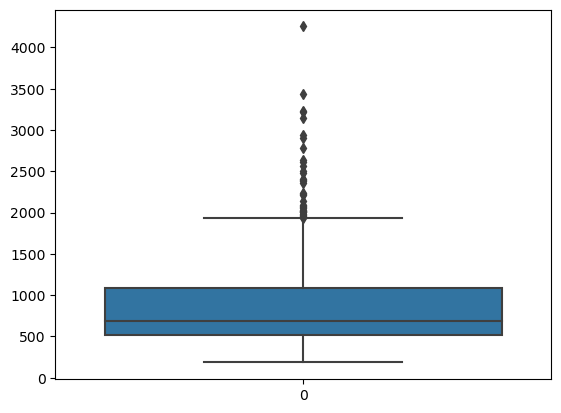

In [25]:
sns.boxplot(df['area_worst'])

<AxesSubplot:>

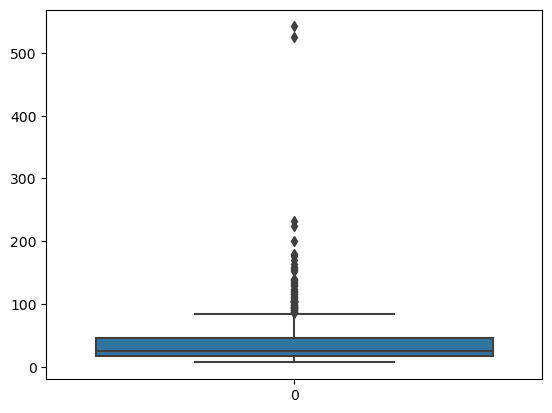

In [26]:
sns.boxplot(df['area_se'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Removing the outliers

In [28]:
df = df[(df['radius_mean'] < 23) & (df['texture_mean'] < 35) & (df['area_worst'] < 2300) & (df['area_se'] < 150)]

In [29]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

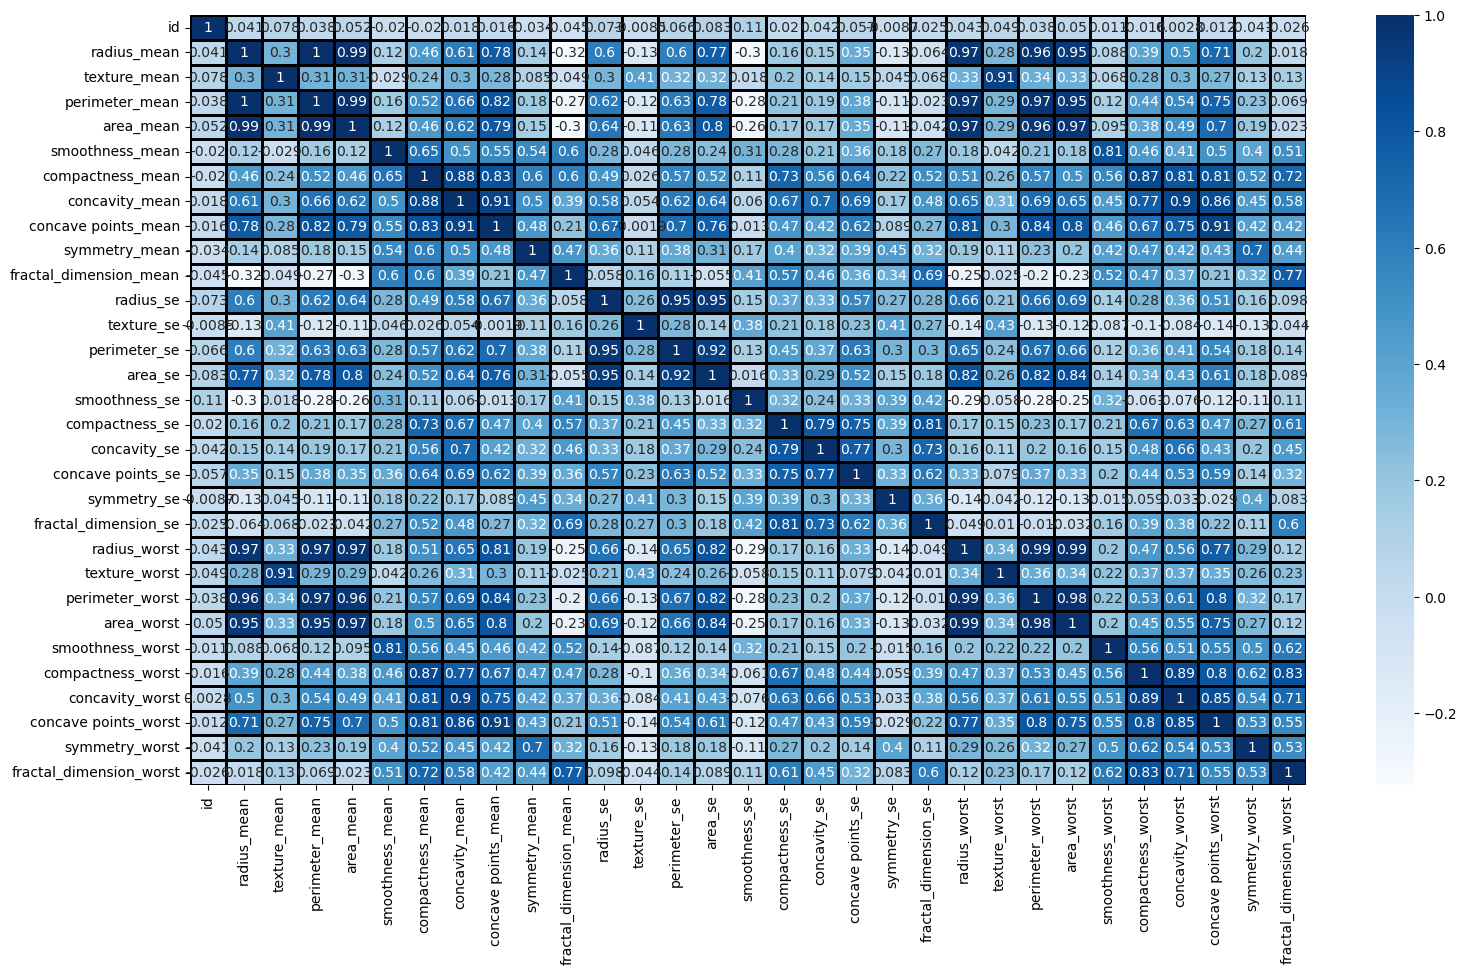

In [30]:
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(),cmap='Blues',linewidths=1,linecolor='black',annot=True)


In [32]:
x = df.drop(['id', 'diagnosis'], axis = 1).values
x

array([[2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, ..., 2.575e-01, 6.638e-01,
        1.730e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [33]:
y = df.diagnosis.replace({'B':0,'M':1})
y

1      1
2      1
3      1
4      1
5      1
      ..
563    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 546, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
#xtrain = (xtrain-xtrain.mean())/(xtrain.max()-xtrain.min())
#xtest = (xtest-xtest.mean())/(xtest.max()-xtest.min())

In [36]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
model = Sequential()
model.add(Dense(20,activation='relu')) #Hidden layer
model.add(Dense(20,activation='relu')) #hidden layer
model.add(Dense(1,activation='sigmoid')) #Output layer (Since it's a binary classification problem)
#Using accuracy as loss function
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest, ytest),verbose=1,batch_size=128,callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 1s 234ms/step - loss: 0.8405 - accuracy: 0.3770 - val_loss: 0.8555 - val_accuracy: 0.3049
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7933 - accuracy: 0.3874 - val_loss: 0.8065 - val_accuracy: 0.3354
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.7517 - accuracy: 0.4031 - val_loss: 0.7629 - val_accuracy: 0.3598
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.7144 - accuracy: 0.4162 - val_loss: 0.7241 - val_accuracy: 0.4024
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 0.6811 - accuracy: 0.4424 - val_loss: 0.6892 - val_accuracy: 0.4390
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6507 - accuracy: 0.4895 - val_loss: 0.6576 - val_accuracy: 0.4756
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6230 - accuracy: 0.5576 - val_loss: 0.6288 - val_accuracy: 0.5671
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 19ms/step - loss: 0.2014 - accuracy: 0.9660 - val_loss: 0.1833 - val_accuracy: 0.9817
Epoch 60/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1991 - accuracy: 0.9660 - val_loss: 0.1808 - val_accuracy: 0.9817
Epoch 61/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1969 - accuracy: 0.9660 - val_loss: 0.1784 - val_accuracy: 0.9817
Epoch 62/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1947 - accuracy: 0.9660 - val_loss: 0.1760 - val_accuracy: 0.9817
Epoch 63/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1926 - accuracy: 0.9660 - val_loss: 0.1738 - val_accuracy: 0.9817
Epoch 64/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1906 - accuracy: 0.9660 - val_loss: 0.1715 - val_accuracy: 0.9817
Epoch 65/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1885 - accuracy: 0.9660 - val_loss: 0.1694 - val_accuracy: 0.9817
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 17ms/step - loss: 0.1304 - accuracy: 0.9738 - val_loss: 0.1055 - val_accuracy: 0.9878
Epoch 118/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1298 - accuracy: 0.9738 - val_loss: 0.1048 - val_accuracy: 0.9878
Epoch 119/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1292 - accuracy: 0.9738 - val_loss: 0.1041 - val_accuracy: 0.9878
Epoch 120/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1286 - accuracy: 0.9738 - val_loss: 0.1035 - val_accuracy: 0.9878
Epoch 121/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1280 - accuracy: 0.9738 - val_loss: 0.1028 - val_accuracy: 0.9878
Epoch 122/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1274 - accuracy: 0.9738 - val_loss: 0.1022 - val_accuracy: 0.9878
Epoch 123/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1268 - accuracy: 0.9738 - val_loss: 0.1016 - val_accuracy: 0.9878
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1059 - accuracy: 0.9764 - val_loss: 0.0784 - val_accuracy: 0.9878
Epoch 176/200
3/3 [==============================] - 0s 19ms/step - loss: 0.1056 - accuracy: 0.9764 - val_loss: 0.0781 - val_accuracy: 0.9878
Epoch 177/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1054 - accuracy: 0.9764 - val_loss: 0.0778 - val_accuracy: 0.9878
Epoch 178/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1050 - accuracy: 0.9764 - val_loss: 0.0775 - val_accuracy: 0.9878
Epoch 179/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1048 - accuracy: 0.9764 - val_loss: 0.0772 - val_accuracy: 0.9878
Epoch 180/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1045 - accuracy: 0.9764 - val_loss: 0.0769 - val_accuracy: 0.9878
Epoch 181/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1042 - accuracy: 0.9764 - val_loss: 0.0766 - val_accuracy: 0.9878
Epoch 

In [38]:
model.history.history

{'loss': [0.8405377268791199,
  0.7932506799697876,
  0.7517085075378418,
  0.7144156098365784,
  0.6810750365257263,
  0.6507474780082703,
  0.6230047941207886,
  0.5975735783576965,
  0.5743591785430908,
  0.5529956221580505,
  0.5334033370018005,
  0.5152010917663574,
  0.4982592463493347,
  0.48236095905303955,
  0.4674791395664215,
  0.4534166753292084,
  0.4402957260608673,
  0.4277680218219757,
  0.41590049862861633,
  0.40474534034729004,
  0.39414459466934204,
  0.38417452573776245,
  0.37461110949516296,
  0.3654714822769165,
  0.35679203271865845,
  0.34847378730773926,
  0.34050196409225464,
  0.3328251540660858,
  0.32553017139434814,
  0.31855425238609314,
  0.3118807077407837,
  0.3055316209793091,
  0.299429714679718,
  0.29363760352134705,
  0.28801852464675903,
  0.2826571762561798,
  0.2775130271911621,
  0.2725415527820587,
  0.2678043842315674,
  0.26321175694465637,
  0.2589053213596344,
  0.25461000204086304,
  0.2505357265472412,
  0.2466145008802414,
  0.242841

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.840538,0.376963,0.855482,0.304878
1,0.793251,0.387435,0.806476,0.335366
2,0.751709,0.403141,0.762933,0.359756
3,0.714416,0.416230,0.724093,0.402439
4,0.681075,0.442408,0.689220,0.439024
...,...,...,...,...
195,0.100472,0.979058,0.072616,0.987805
196,0.100242,0.979058,0.072374,0.987805
197,0.100009,0.979058,0.072135,0.987805
198,0.099789,0.979058,0.071898,0.987805


<AxesSubplot:>

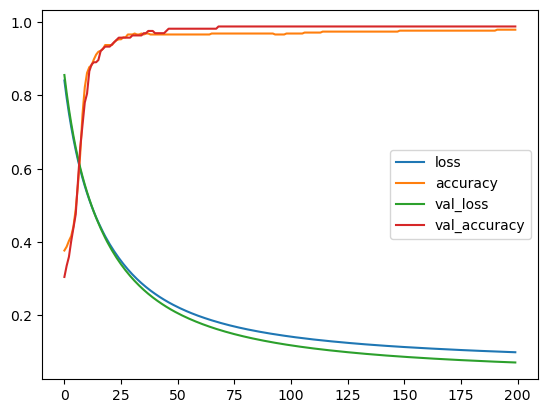

In [40]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()


In [41]:
ypred=model.predict(xtest)

6/6 [==============================] - 0s 2ms/step


In [42]:
ypred = np.where(ypred>0.5,1,0)
ypred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       112
           1       0.98      0.98      0.98        52

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)


array([[111,   1],
       [  1,  51]], dtype=int64)

<AxesSubplot:>

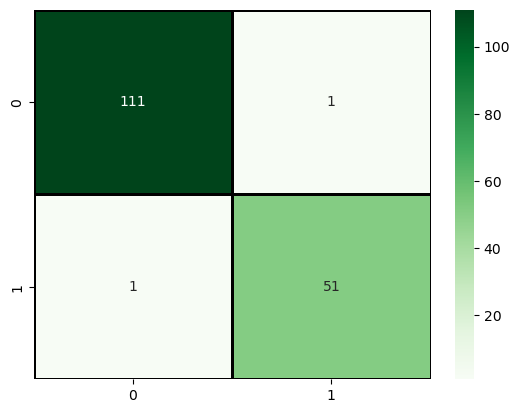

In [45]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,cmap='Greens',fmt='g',linewidth=2,linecolor='black')